In [263]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
col=['Date','Earnings','Real Earnings']
df = pd.read_csv ('data_csv.csv',usecols=col)
df.head()

,Date,Earnings,Real Earnings
0,1881-01-01,0.49,12.89
1,1881-02-01,0.48,12.65
2,1881-03-01,0.48,12.54
3,1881-04-01,0.47,12.31
4,1881-05-01,0.47,12.32


In [264]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
datetime.datetime.strptime
df=df[(df['Date']>datetime.date(2000,1,1))]

/Users/hussain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


In [265]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=215, freq=None)

In [276]:
df['pe_ratio']=df['Earnings']/df['Real Earnings']

In [277]:
df

,Earnings,Real Earnings,pe_ratio
Date,,,
2000-02-01,50.02,73.60,0.679620
2000-03-01,50.95,74.35,0.685272
2000-04-01,51.27,74.78,0.685611
2000-05-01,51.60,75.16,0.686535
2000-06-01,51.92,75.24,0.690058
...,...,...,...
2017-08-01,106.06,107.92,0.982765
2017-09-01,107.08,108.39,0.987914
2017-10-01,108.01,109.40,0.987294


In [281]:
X = df[['Earnings']]
y = df[['pe_ratio']]


In [282]:
X.size

215

In [283]:
y.size

215

In [284]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [285]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
lr=regression_model.fit(X_train, y_train)

In [286]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [287]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
get_cv_scores(lr)

CV Mean:  0.48854391912451484
STD:  0.1852941477139868




In [288]:
print(lr.intercept_)
print(lr.coef_)

[0.671056]
[[0.00259851]]


In [289]:
y_pred = regression_model.predict(X_test)

In [298]:
y_test.shape

(54, 1)

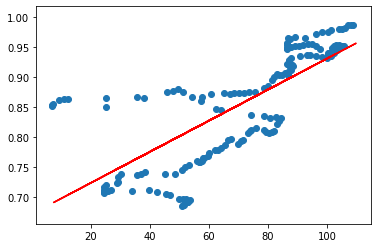

In [290]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [299]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04878324269862202
Mean Squared Error: 0.0038348947555549916
Root Mean Squared Error: 0.0619265270748731
